Goal : The mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. After answering each question, write a brief explanation of your results in a markdown cell of your Jupyter notebook.

This project will require you to make plots that communicate your results. Make sure that any plots you create have a title, labeled axes, and a legend if necessary; and include plt.show() at the end of each cell with a plot.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products_df = pd.read_csv('/datasets/products.csv', sep=';')
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
depts_df = pd.read_csv('/datasets/departments.csv', sep=';')
order_prdcts_df = pd.read_csv('/datasets/order_products.csv', sep=';')

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [3]:
# Check for duplicated orders

orders_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
#orders_df.sample(30)
orders_df.duplicated().sum()

15

In [5]:
# Check for all orders placed Wednesday at 2:00 AM

wed_2_am = orders_df[(orders_df['order_dow']==3) & (orders_df['order_hour_of_day']==14)]

print(wed_2_am.head())

     order_id  user_id  order_number  order_dow  order_hour_of_day  \
43     698527    95296            58          3                 14   
162     48662    22131             5          3                 14   
319   1343043   194052             7          3                 14   
560   1508728   178611            29          3                 14   
780   2743463    72360            25          3                 14   

     days_since_prior_order  
43                     22.0  
162                     3.0  
319                    16.0  
560                     5.0  
780                     0.0  


In [6]:
# Remove duplicate orders

print(orders_df.duplicated().sum())
print()
print(orders_df.value_counts())

orders_df = orders_df.drop_duplicates().reset_index(drop=True)

15

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
1021560   53767    3             3          2                  9.0                       2
467134    63189    21            3          2                  2.0                       2
391768    57671    19            3          2                  10.0                      2
2282673   86751    49            3          2                  2.0                       2
408114    68324    4             3          2                  18.0                      2
                                                                                        ..
1141863   88987    2             1          11                 14.0                      1
1141854   125458   91            6          8                  2.0                       1
1141847   156072   4             2          21                 6.0                       1
1141845   153218   2             3          8                  6.0                       1


In [7]:
# Double check for duplicate rows

print(orders_df.duplicated().sum())

0


In [8]:
# Double check for duplicate order IDs only

print(orders_df['order_id'].duplicated().sum())

0


### `products` data frame

In [9]:
# Check for fully duplicate rows

products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
products_df.duplicated().sum()

0

In [12]:
# Check for just duplicate product IDs

print(products_df['product_id'].duplicated().sum())

0


In [13]:
# Check for just duplicate product names (convert names to lowercase to compare better)

products_df['product_name'] = products_df['product_name'].str.lower()
print(products_df['product_name'].duplicated().sum())
print()
print(products_df['product_name'].duplicated())

1361

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool


In [14]:
# Check for duplicate product names that aren't missing

print(products_df['product_name'].value_counts(dropna=False))

NaN                                                                     1258
green tea with ginseng and honey                                           3
family size lasagna with meat & sauce                                      2
rigatoni with chicken & pesto                                              2
proactive health indoor weight & hairball care with chicken cat food       2
                                                                        ... 
extra hot habanero pepper sauce                                            1
moisturizing skin cream                                                    1
honey banana chips                                                         1
oregano oil- standardized- liquid vcaps                                    1
apricot pineapple preserves                                                1
Name: product_name, Length: 48333, dtype: int64


### `departments` data frame

In [15]:
depts_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [16]:
depts_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [17]:
depts_df.duplicated().sum()
depts_df.value_counts()

department_id  department     
1              frozen             1
12             meat seafood       1
20             deli               1
19             snacks             1
18             babies             1
17             household          1
16             dairy eggs         1
15             canned goods       1
14             breakfast          1
13             pantry             1
11             personal care      1
2              other              1
10             bulk               1
9              dry goods pasta    1
8              pets               1
7              beverages          1
6              international      1
5              alcohol            1
4              produce            1
3              bakery             1
21             missing            1
dtype: int64

### `aisles` data frame

In [18]:
aisles_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [19]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [20]:
aisles_df.duplicated().sum()

0

In [21]:
aisles_df.value_counts()

aisle_id  aisle                     
1         prepared soups salads         1
85        food storage                  1
99        canned fruit applesauce       1
98        juice nectars                 1
97        baking supplies decor         1
                                       ..
40        dog food care                 1
39        seafood counter               1
38        frozen meals                  1
37        ice cream ice                 1
134       specialty wines champagnes    1
Length: 134, dtype: int64

In [22]:
# Check for fullly duplicate rows

order_prdcts_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [23]:
order_prdcts_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [24]:
order_prdcts_df.duplicated().sum()

0

In [25]:
print(order_prdcts_df[order_prdcts_df.duplicated(subset=['order_id', 'product_id'])])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


## Find and remove missing values


### `products` data frame

In [26]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [27]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


In [28]:
# Are all of the missing product names associated with aisle ID 100?

products_df['aisle_id'].value_counts(dropna=False)

100    1258
45     1246
37     1091
47     1038
120    1026
       ... 
113      47
82       44
32       32
68       26
18       12
Name: aisle_id, Length: 134, dtype: int64

In [29]:
# Are all of the missing product names associated with department ID 21?

products_df['department_id'].value_counts(dropna=False)

11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: department_id, dtype: int64

In [30]:
# What is this aisle and department?

In [31]:
# Fill missing product names with 'Unknown'

products_df['aisle_id'] = products_df['aisle_id'].where(products_df['aisle_id'] != 'NaN', 'Unknown')

products_df['aisle_id'].value_counts(dropna=False)

100    1258
45     1246
37     1091
47     1038
120    1026
       ... 
113      47
82       44
32       32
68       26
18       12
Name: aisle_id, Length: 134, dtype: int64

### `orders` data frame

In [32]:
orders_df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [33]:
# Are there any missing values where it's not a customer's first order?

#repeat_customers = orders_df[(orders_df['order_number'] > 1)]
#non_null_values = order_prdcts_df[(order_prdcts_df['order_id'] == 0)]

#print(order_prdcts_df['product_id'].value_counts(dropna=False))
print()
print()
#print(orders_df['order_number'].value_counts(dropna=False))

print(orders_df[(orders_df['days_since_prior_order'].isna()) & (orders_df['order_number'] != 1)])



Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


### `order_products` data frame

In [34]:
print(order_prdcts_df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [35]:
order_prdcts_df.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [36]:
# What are the min and max values in this column?

order_prdcts_df['add_to_cart_order'].describe()

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

In [37]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

miss_cart_order = order_prdcts_df[order_prdcts_df['add_to_cart_order'].isna()]

print(miss_cart_order)

#missing_cart_order_ids = order_prdcts_df.groupby()

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [38]:
# Do all orders with missing values have more than 64 products?

print(miss_cart_order.groupby('order_id')['product_id'].count().sort_values())
#print(miss_cart_order.groupby('order_id')['product_id'].sum())


order_id
9310        1
747668      1
1598369     1
1677118     1
2170451     1
           ..
1959075    34
171934     40
2136777    44
3308010    51
61355      63
Name: product_id, Length: 70, dtype: int64


In [39]:
# Replace missing values with 999 and convert column to integer type

order_prdcts_df['add_to_cart_order'] = order_prdcts_df['add_to_cart_order'].fillna(999).astype(int)
print(order_prdcts_df['add_to_cart_order'].isna().sum())
print(order_prdcts_df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [40]:
orders_df.info

print(orders_df['order_hour_of_day'].sort_values().nunique())

24


In [41]:
print(orders_df['order_dow'].sort_values().nunique())

7


In [42]:
orders_df['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

### [A2] What time of day do people shop for groceries?

In [43]:
orders_df.describe(include='all')
hod = orders_df['order_hour_of_day']
hod.describe()

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

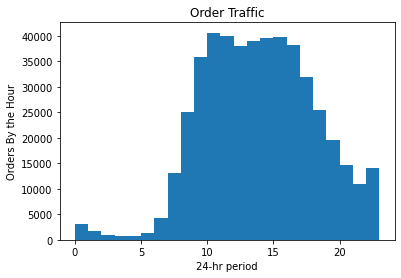

In [44]:
orders_df['order_hour_of_day'].plot(kind='hist', bins=23, title='Order Traffic')

plt.xlabel('24-hr period')
plt.ylabel('Orders By the Hour')
plt.show()

### [A3] What day of the week do people shop for groceries?

In [45]:
tdow = orders_df['order_dow'].describe()
tdow

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

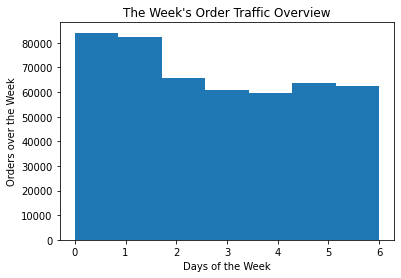

In [46]:
orders_df['order_dow'].plot(kind='hist', bins=7, title="The Week's Order Traffic Overview")

plt.xlabel('Days of the Week')
plt.ylabel('Orders over the Week')

plt.show()

### [A4] How long do people wait until placing another order?

In [47]:
reorder_time = orders_df['days_since_prior_order'].describe()
reorder_time

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

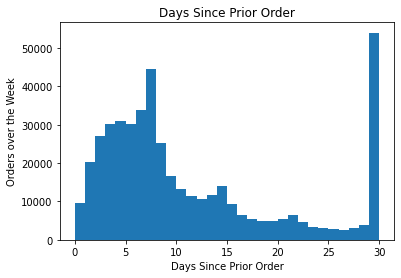

In [48]:
orders_df['days_since_prior_order'].plot(kind='hist', bins=30, title="Days Since Prior Order")

plt.xlabel('Days Since Prior Order')
plt.ylabel('Orders over the Week')

plt.show()

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

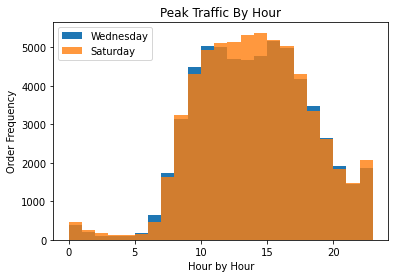

In [49]:
#Wed = 3
orders_df[orders_df['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist',
                                                                 bins=23,
                                                                 title='Peak Traffic By Hour')
#Sat = 6
orders_df[orders_df['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins=23, alpha=0.80)

plt.xlabel('Hour by Hour')
plt.ylabel('Order Frequency')

plt.legend(['Wednesday','Saturday'])
plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [50]:
#orders_df.info()
orders_df.head()
#orders_df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


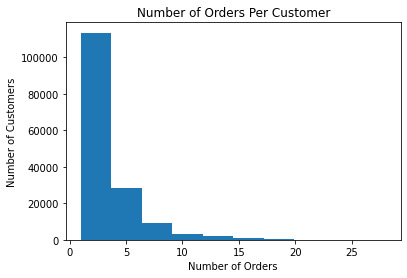

In [51]:
user_order = orders_df.groupby('user_id')['order_id'].count()

user_order.plot(kind='hist', x='order_id', title='Number of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

In [52]:
orders_df.query("user_id == 17")

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
8485,603376,17,22,6,16,4.0
63887,2795254,17,25,0,11,6.0
155724,2430354,17,8,0,15,6.0
229231,2760791,17,32,1,22,4.0
273909,3237467,17,5,6,17,5.0
342732,1389057,17,13,1,13,6.0
407135,805025,17,11,4,15,4.0


### [B3] What are the top 20 popular products (display their id and name)?

In [53]:
bi_prdct_df = order_prdcts_df.merge(products_df, on='product_id', how='left')

top_20_prdcts = bi_prdct_df.groupby(['product_id', 'product_name']).size().reset_index(name='count')
top_20_prdcts = top_20_prdcts.sort_values(by='count', ascending=False)

top_20_prdcts[['product_id', 'product_name']].head(20)

,product_id,product_name
22332,24852,banana
11772,13176,bag of organic bananas
18970,21137,organic strawberries
19660,21903,organic baby spinach
42362,47209,organic hass avocado
42863,47766,organic avocado
42739,47626,large lemon
15037,16797,strawberries
23546,26209,limes
25022,27845,organic whole milk


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [54]:
order_prdcts_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [55]:
#Total Cart Order = tco
tco = order_prdcts_df.groupby('order_id')['product_id'].count()
tco.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

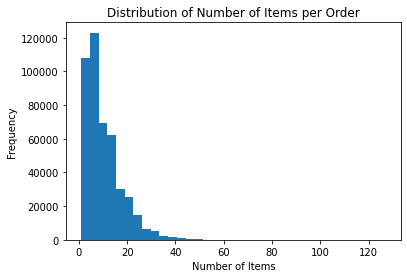

In [56]:
tco.plot(kind='hist', 
         bins=35, 
         title='Distribution of Number of Items per Order')

plt.xlabel('Number of Items')
plt.ylabel('Frequency')

plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [57]:
order_counts = order_prdcts_df[order_prdcts_df['reordered'] == 1]['product_id'].value_counts()

reorder_prdct_df = order_counts.reset_index()
reorder_prdct_df.columns = ['product_id', 'reordered_count']

top_20_reorder = reorder_prdct_df.head(20)
top_20_reorder = top_20_reorder.merge(products_df[['product_id', 'product_name']], on='product_id', how='left')

top_20_reorder

,product_id,reordered_count,product_name
0,24852,55763,banana
1,13176,44450,bag of organic bananas
2,21137,28639,organic strawberries
3,21903,26233,organic baby spinach
4,47209,23629,organic hass avocado
5,47766,18743,organic avocado
6,27845,16251,organic whole milk
7,47626,15044,large lemon
8,27966,14748,organic raspberries
9,16797,13945,strawberries


<AxesSubplot:xlabel='product_name'>

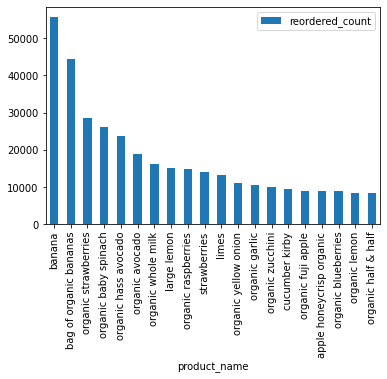

In [58]:
top_20_reorder.plot(x = 'product_name', y = 'reordered_count', kind = 'bar')

### [C3] For each product, what proportion of its orders are reorders?

In [59]:
order_prdcts_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [60]:
order_prdcts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


In [61]:
proportion_df = pd.pivot_table(order_prdcts_df, index='product_id', columns='reordered', values='order_id', aggfunc='count')
proportion_df.rename(columns={0: 'First time order', 1: 'Reordered'}, inplace=True)
proportion_df = proportion_df.fillna(0)
proportion_df['Reordered Proportion (%)'] = (proportion_df['Reordered']) / (proportion_df['First time order'] + proportion_df['Reordered'])
proportion_df

reordered,First time order,Reordered,Reordered Proportion (%)
product_id,,,
1,122.0,158.0,0.564286
2,11.0,0.0,0.000000
3,11.0,31.0,0.738095
4,24.0,25.0,0.510204
7,1.0,1.0,0.500000
...,...,...,...
49690,1.0,4.0,0.800000
49691,41.0,31.0,0.430556
49692,7.0,5.0,0.416667


In [62]:
mrg = proportion_df.merge(products_df, on='product_id', how='left')
mrg

,product_id,First time order,Reordered,Reordered Proportion (%),product_name,aisle_id,department_id
0,1,122.0,158.0,0.564286,chocolate sandwich cookies,61,19
1,2,11.0,0.0,0.000000,all-seasons salt,104,13
2,3,11.0,31.0,0.738095,robust golden unsweetened oolong tea,94,7
3,4,24.0,25.0,0.510204,smart ones classic favorites mini rigatoni wit...,38,1
4,7,1.0,1.0,0.500000,pure coconut water with orange,98,7
...,...,...,...,...,...,...,...
45568,49690,1.0,4.0,0.800000,high performance energy drink,64,7
45569,49691,41.0,31.0,0.430556,original pancake & waffle mix,130,14
45570,49692,7.0,5.0,0.416667,organic instant oatmeal light maple brown sugar,130,14
45571,49693,14.0,11.0,0.440000,spring water body wash,127,11


In [63]:
mrg.query("product_id == 3513")

,product_id,First time order,Reordered,Reordered Proportion (%),product_name,aisle_id,department_id
3214,3513,35.0,33.0,0.485294,organic blueberry,24,4


### [C4] For each customer, what proportion of their products ordered are reorders?

In [64]:
orders_df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [65]:
order_prdcts_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [66]:
ordr_mrg = orders_df[['user_id', 'order_id']].merge(order_prdcts_df[['order_id','product_id','reordered']], on='order_id', how='left')
ordr_mrg

,user_id,order_id,product_id,reordered
0,183418,1515936,19048.0,1.0
1,183418,1515936,47766.0,1.0
2,183418,1515936,45066.0,0.0
3,183418,1515936,24082.0,0.0
4,183418,1515936,24363.0,0.0
...,...,...,...,...
4573908,1730,2071924,1503.0,0.0
4573909,1730,2071924,4778.0,1.0
4573910,1730,2071924,11512.0,1.0
4573911,1730,2071924,4920.0,1.0


In [67]:
user_reorders = pd.pivot_table(ordr_mrg, index='user_id', columns='reordered', values='order_id', aggfunc='count')
user_reorders.rename(columns={0: 'First time order', 1: 'Reordered'}, inplace=True)

user_reorders = user_reorders.fillna(0)
user_reorders['Reordered Proportion (%)'] = user_reorders['Reordered'] / (user_reorders['Reordered']+user_reorders['First time order'])

user_reorders

reordered,First time order,Reordered,Reordered Proportion (%)
user_id,,,
2,25.0,1.0,0.038462
4,2.0,0.0,0.000000
5,4.0,8.0,0.666667
6,4.0,0.0,0.000000
7,1.0,13.0,0.928571
...,...,...,...
206203,21.0,6.0,0.222222
206206,6.0,15.0,0.714286
206207,5.0,41.0,0.891304


In [68]:
user_reorders.query("user_id == 220")

reordered,First time order,Reordered,Reordered Proportion (%)
user_id,,,
220,6.0,7.0,0.538462


### [C5] What are the top 20 items that people put in their carts first? 

In [69]:
order_prdcts_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [70]:
first_item = order_prdcts_df[order_prdcts_df['add_to_cart_order']==1]
top_first_items = first_item['product_id'].value_counts()[:20].reset_index()
top_first_items.rename(columns={'index': 'product_id', 'product_id': 'frequency'}, inplace=True)

In [71]:
top_20_items = top_first_items.merge(products_df[['product_id', 'product_name']], on='product_id', how='left')
top_20_items

,product_id,frequency,product_name
0,24852,15562,banana
1,13176,11026,bag of organic bananas
2,27845,4363,organic whole milk
3,21137,3946,organic strawberries
4,47209,3390,organic hass avocado
5,21903,3336,organic baby spinach
6,47766,3044,organic avocado
7,19660,2336,spring water
8,16797,2308,strawberries
9,27966,2024,organic raspberries
